In [11]:
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd

# File to Load (Remember to change these)
city_data_to_load = "data/city_data.csv"
ride_data_to_load = "data/ride_data.csv"

# Read the City and Ride Data

ride_df = pd.read_csv(ride_data_to_load)
city_df = pd.read_csv(city_data_to_load)

# Combine the data into a single dataset

data = pd.merge(ride_df,city_df, on='city', how='outer')
data
# Display the data table for preview
data.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2018-01-14 10:14:22,13.83,5739410935873,5,Urban
1,Lake Jonathanshire,2018-04-07 20:51:11,31.25,4441251834598,5,Urban
2,Lake Jonathanshire,2018-03-09 23:45:55,19.89,2389495660448,5,Urban
3,Lake Jonathanshire,2018-04-07 18:09:21,24.28,7796805191168,5,Urban
4,Lake Jonathanshire,2018-01-02 14:14:50,13.89,424254840012,5,Urban


In [12]:
color_scheme = {'Gold':'#FFD700', 'Light Sky Blue':'#87CEFA', 'Light Coral':'#F08080'}

## Bubble Plot of Ride Sharing Data

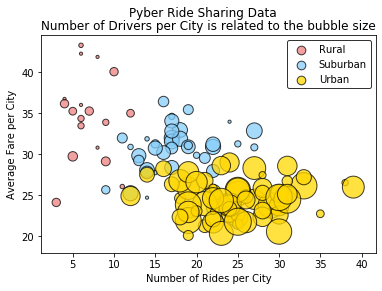

In [13]:
# Obtain the x and y coordinates for each of the three city types
by_city = data.groupby('city')

# var holding avg fare by city
avg_fare = by_city.mean()['fare']

#var holding rides by city
ride_count = by_city['ride_id'].count()

# num of drivers
driver_count = by_city.mean()['driver_count']

# city type data
city_type = city_df.set_index('city')['type']

# dataframe from above series
city_info = pd.DataFrame({
    "Number of Rides": ride_count,
    "Average Fare": avg_fare,
    "Number of Drivers": driver_count,
    "Type of City": city_type
})

city_info.sort_values('Number of Drivers', ascending = False)

# Build the scatter plots for each city type
rural = city_info[city_info['Type of City'] == 'Rural']
suburban = city_info[city_info['Type of City'] == 'Suburban']
urban = city_info[city_info['Type of City'] == 'Urban']

#Color 
city_color = {'Urban': color_scheme['Gold'], 
              'Suburban': color_scheme['Light Sky Blue'], 'Rural': color_scheme['Light Coral']}

plt.suptitle('Pyber Ride Sharing Data')

# three scatter plots for each city type
plt.scatter(rural['Number of Rides'], rural['Average Fare'], s = rural['Number of Drivers']*10, color = city_color['Rural'], edgecolor = 'black', label = 'Rural', alpha = .75)
plt.scatter(suburban['Number of Rides'], suburban['Average Fare'], s = suburban['Number of Drivers']*10, color = city_color['Suburban'], edgecolor = 'black', label = 'Suburban', alpha = .75)
plt.scatter(urban['Number of Rides'], urban['Average Fare'], s = urban['Number of Drivers']*10, color = city_color['Urban'], edgecolor = 'black', label = 'Urban', alpha = .75)

#print scatter plot
plt.title('Number of Drivers per City is related to the bubble size')
plt.xlabel('Number of Rides per City')
plt.ylabel('Average Fare per City')

# Create a legend

lgnd = plt.legend(frameon = True, edgecolor = 'black')
lgnd.legendHandles[0]._sizes = [75]
lgnd.legendHandles[1]._sizes = [75]
lgnd.legendHandles[2]._sizes = [75]





In [14]:
# Show plot
plt.show()

## Total Fares by City Type

(-1.1273829422200983,
 1.4023303422929314,
 -1.2365375704429984,
 1.106501789068714)

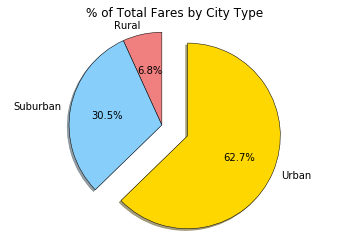

In [15]:
# Calculate Type Percents
fare_type = data.groupby('type')['type', 'fare', 'ride_id', 'driver_count']

#total fare by city
fare_sum = fare_type.sum()['fare']


# Build Pie Chart

labels = fare_sum.index

colors = [city_color[n] for n in labels]
explode = [0 , 0, .3]
plt.pie(fare_sum, startangle = 90, colors = colors, explode = explode, labels = labels, autopct = "%1.1f%%", shadow = True, wedgeprops = {'linewidth': .5, 'edgecolor': 'black'})


plt.title('% of Total Fares by City Type')
plt.axis('equal')

# Save Figure


In [16]:
# Show Figure
plt.show()

## Total Rides by City Type

(-1.1128871227105397,
 1.3706294345098446,
 -1.2843268859502617,
 1.1087774707595364)

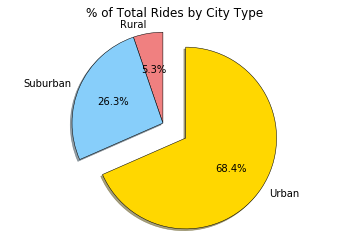

In [17]:
# Calculate Ride Percents
ride_type = data.groupby('type')['type', 'fare', 'ride_id', 'driver_count']
ride_sum = ride_type.count()['ride_id']

# Build Pie Charts

labels = ride_sum.index
plt.pie(ride_sum, startangle = 90, explode = explode, colors = colors, labels = labels, autopct = "%1.1f%%", shadow = True, wedgeprops = {'linewidth': .5, 'edgecolor': 'black'})
plt.title('% of Total Rides by City Type')
plt.axis('equal')


# Save Figure


In [18]:
# Show Figure
plt.show()

## Total Drivers by City Type

(-1.104672587897539,
 1.3756658113080025,
 -1.2560456258246073,
 0.9506887989409958)

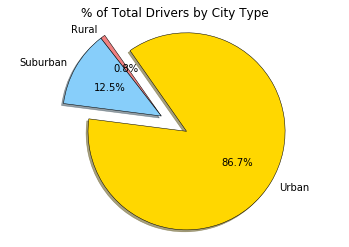

In [19]:
# Calculate Driver Percents

driver_sum = ride_type.sum()['driver_count']

labels = driver_sum.index
plt.pie(driver_sum, startangle = 125, explode = explode, colors = colors, labels = labels, autopct = "%1.1f%%", shadow = True, wedgeprops = {'linewidth': .5, 'edgecolor': 'black'})
plt.title('% of Total Drivers by City Type')
plt.axis('equal')



# Save Figure


In [20]:
# Show Figure
plt.show()